In [6]:
%load_ext autoreload
%autoreload 2
import os
import sys
import time
import numpy as np
from Shapley2 import ShapNN
from DSap1 import DShap
import matplotlib.pyplot as plt
import sklearn
from shap_utils import *
%matplotlib inline
MEM_DIR = './'

d:\DataShapley\DSap1.py:60: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.model_family is 'logistic':


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.1/11.0 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.2/11.0 MB 1.6 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.0 MB 1.6 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.0 MB 807.1 kB/s eta 0:00:14
    --------------------------------------- 0.2/11.0 MB 841.6 kB/s eta 0:00:13
    --------------------------------------- 0.2/11.0 MB 841.6 kB/s eta 0:00:13
    --------------------------------------- 0.2/11.0 MB 765.3 kB/s eta 0:00:15
   - -------------------------------------- 0.3/11.0 MB 741.6 kB/s eta 0:00:15
   - -------------------------------------- 0.3/11.0 MB 741.6 kB/s eta 0:00:15
   - -------------------------------------- 0.3/11.0 MB 741.6 kB/s eta 0:00:15
   - -------------------------------------- 0.3/11.0 MB 655.5 kB/s et

In [1]:
pip install tensorflow



     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------------------------------------- 46.2/46.2 kB 765.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/377.0 MB 807.1 kB/s eta 0:07:47
   ---------------------------------------- 0.2/377.0 MB 807.1 kB/s eta 0:07:47
   ---------------------------------------- 0.2/377.0 MB 807.1 kB/s eta 0:07:47
   ---------------------------------------- 0.2/377.0 MB 761.1 kB/s eta 0:08:15
   ---------------------------------------- 0.2/377.0 MB 761.1 kB/s eta 0:08:15
   ------------------

Let's have a calssification problem and use the a losigitic regression model for a small data set of size 100.

In [2]:
problem, model = 'classification', 'logistic'
hidden_units = [] # Empty list in the case of logistic regression.
train_size = 100

## Create Synthetic Dataset

Let's create a synthetic data set with input-output $y = Bernouli(f(x))$ where $f$ is a polynomial of oder 'difficulty' and $x \in \mathscr{R}^d$. ('important_dims' determines the number of $d$ dimensions in $x$ that are non-null)

In [4]:
d, difficulty = 50, 1
num_classes = 2
tol = 0.03
target_accuracy = 0.7
important_dims = 5
clf = return_model(model, solver='liblinear', hidden_units=tuple(hidden_units))
_param = 1.0
for _ in range(100):
    X_raw = np.random.multivariate_normal(mean=np.zeros(d), cov = np.eye(d), 
                                          size=train_size + 5000)
    _, y_raw, _, _ = label_generator(
        problem, X_raw, param = _param,  difficulty = difficulty, important=important_dims)
    clf.fit(X_raw[:train_size], y_raw[:train_size])
    test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
    if test_acc > target_accuracy:                                                         
        break
    _param *= 1.1
print('Performance using the whole training set = {0:.2f}'.format(test_acc))

Performance using the whole training set = 0.71


## Running

Now let's create the instance that takes cares of computing all the algorithms for the data set. Here we run it several times one-after-another, but in a real-world scenario they could be run in parallel. 

In [13]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1)
dshap.run(100, 0.1)

1
LOO values calculated! True
learning rate la: None
(100, 50) (100,)


10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations
100 out of 100 G-Shapley iterations
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
learning rate la: None
10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iteration

In [5]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
print(X.shape, y.shape)
print(X_test.shape, y_test.shape)

(100, 50) (100,)
(5000, 50) (5000,)


In [8]:
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1)
dshap.run(100, 0.1)

d:\DataShapley\DSap1.py:60: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.model_family is 'logistic':


1
LOO values calculated! True
sources LOO: {0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: arr

Now we merge results for the parallel runs:

In [10]:
dshap.merge_results()

./temp\mem_tmc_0000.pkl
./temp\mem_tmc_0001.pkl
./temp\mem_tmc_0002.pkl
./temp\mem_tmc_0003.pkl
./temp\mem_tmc_0004.pkl
./temp\mem_tmc_0005.pkl
./temp\mem_tmc_0006.pkl
./temp\mem_tmc_0007.pkl
./temp\mem_tmc_0008.pkl
./temp\mem_tmc_0009.pkl
./temp\mem_tmc_0010.pkl
./temp\mem_tmc_0011.pkl
./temp\mem_tmc_0012.pkl
./temp\mem_tmc_0013.pkl
./temp\mem_tmc_0014.pkl
./temp\mem_tmc_0015.pkl
./temp\mem_tmc_0016.pkl
./temp\mem_tmc_0017.pkl
./temp\mem_tmc_0018.pkl
./temp\mem_tmc_0019.pkl
./temp\mem_tmc_0020.pkl
./temp\mem_g_0000.pkl
./temp\mem_g_0001.pkl
./temp\mem_g_0002.pkl
./temp\mem_g_0003.pkl
./temp\mem_g_0004.pkl
./temp\mem_g_0005.pkl
./temp\mem_g_0006.pkl
./temp\mem_g_0007.pkl
./temp\mem_g_0008.pkl
./temp\mem_g_0009.pkl
./temp\mem_g_0010.pkl
./temp\mem_g_0011.pkl
./temp\mem_g_0012.pkl
./temp\mem_g_0013.pkl
./temp\mem_g_0014.pkl
./temp\mem_g_0015.pkl
./temp\mem_g_0016.pkl
./temp\mem_g_0017.pkl
./temp\mem_g_0018.pkl
./temp\mem_g_0019.pkl
./temp\mem_g_0020.pkl


Let's look at the convergence plots of the algorithms.

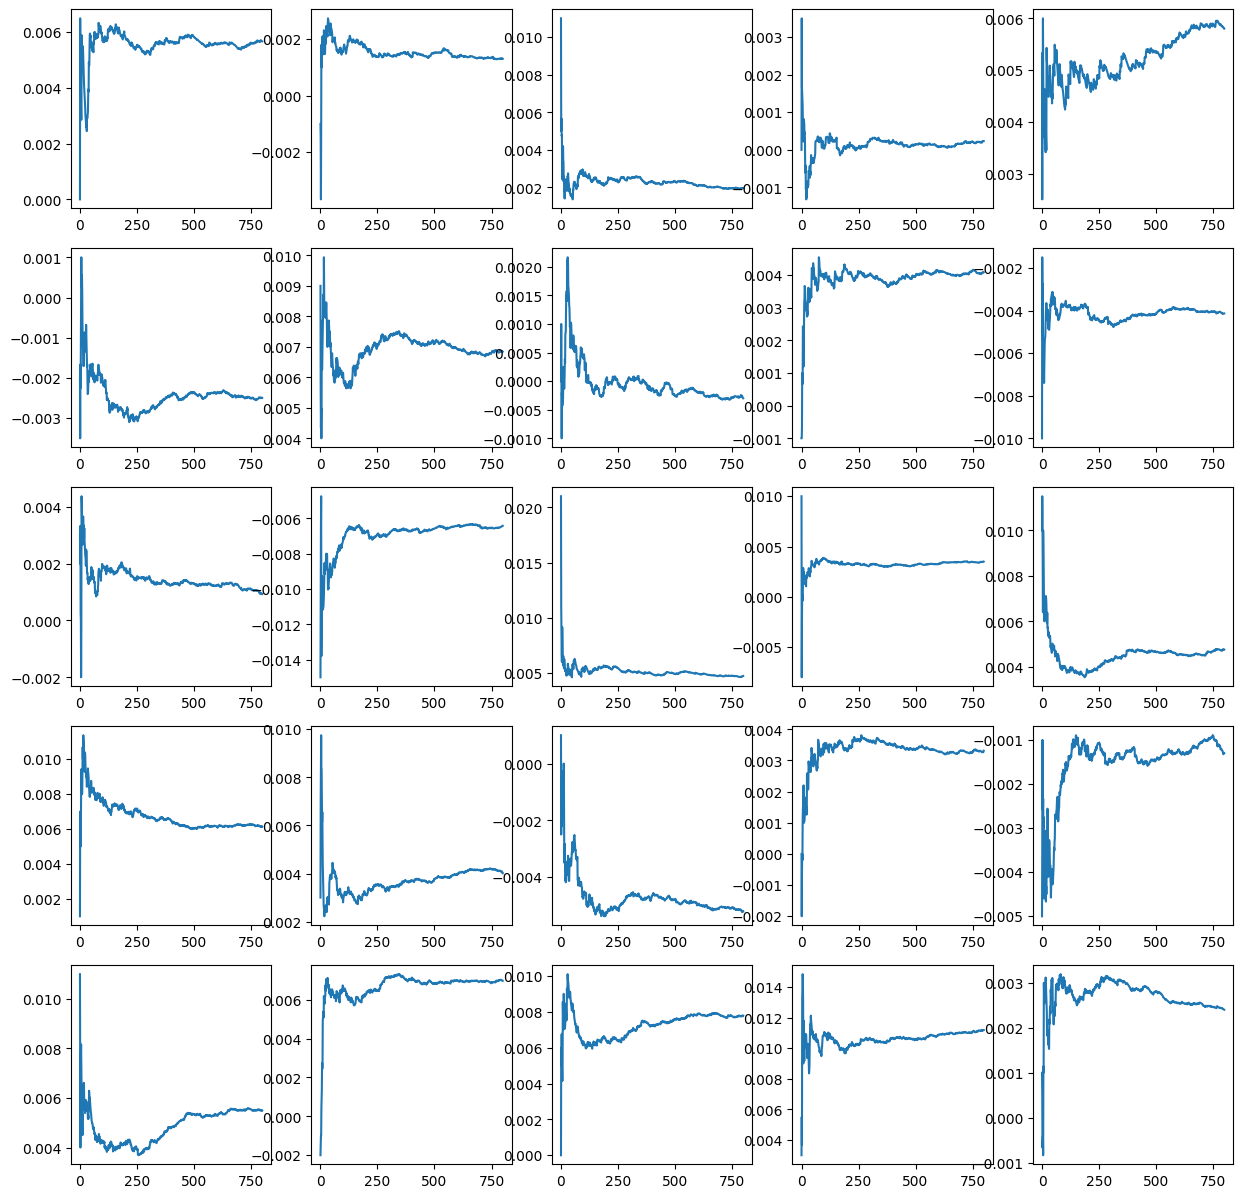

In [15]:
convergence_plots(dshap.marginals_tmc)

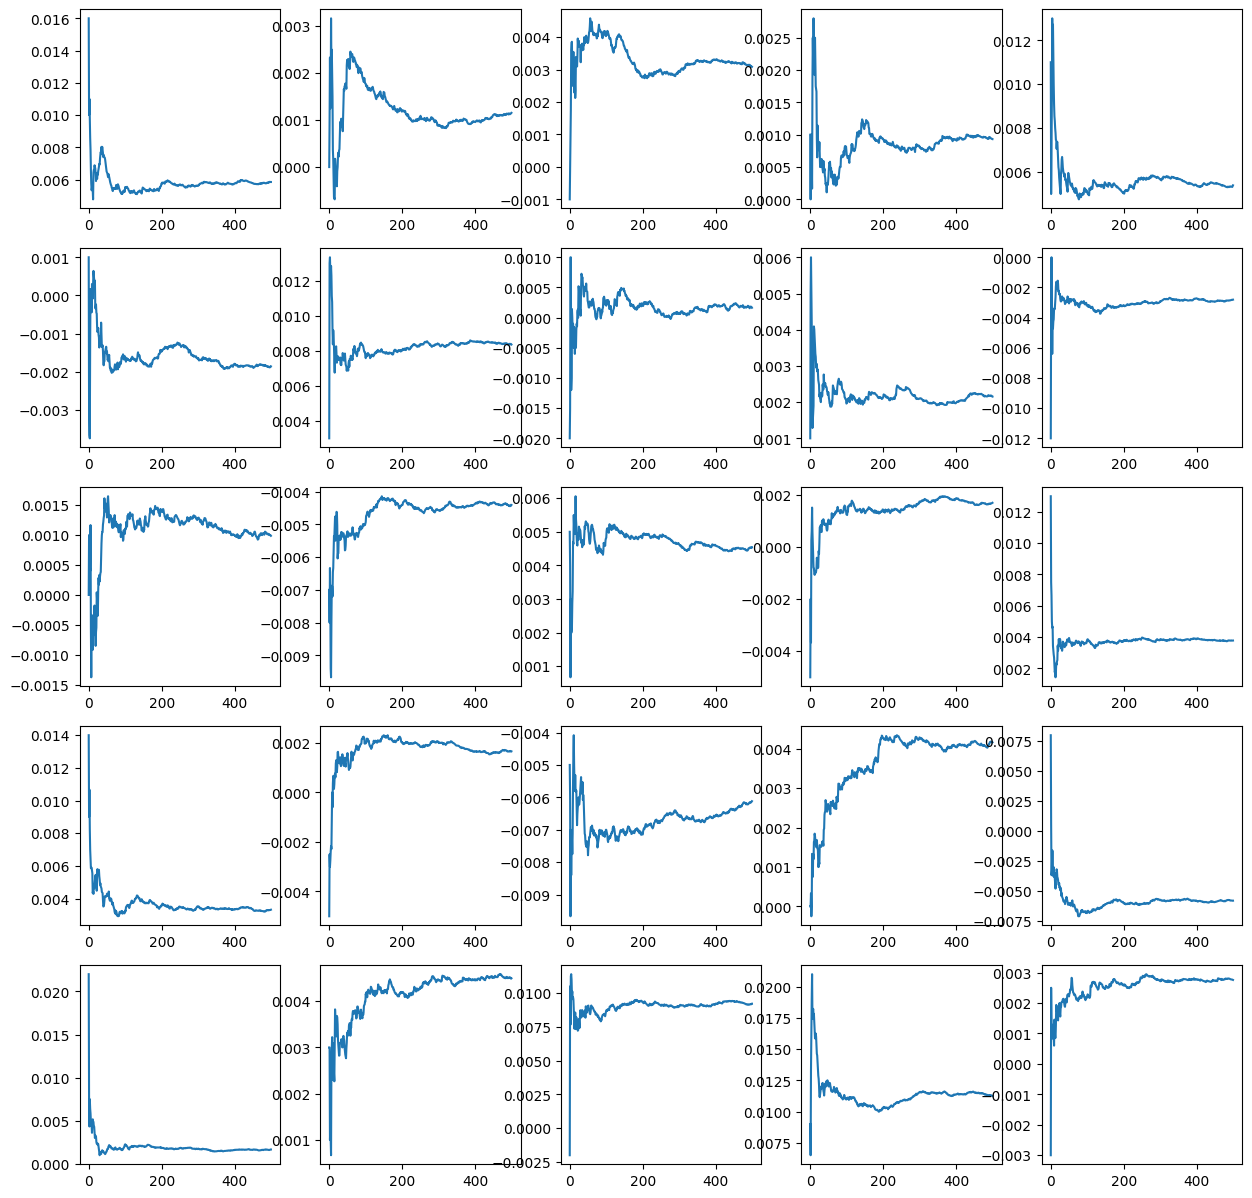

In [16]:
convergence_plots(dshap.marginals_g)

In [13]:
dshap.marginals_tmc

array([[ 0.   , -0.001,  0.011, ...,  0.005, -0.004, -0.001],
       [ 0.013, -0.002, -0.001, ...,  0.002, -0.013,  0.016],
       [ 0.   , -0.008,  0.007, ..., -0.009, -0.006,  0.005],
       ...,
       [ 0.   , -0.001,  0.004, ..., -0.008, -0.001, -0.001],
       [-0.001, -0.009,  0.013, ..., -0.005,  0.002,  0.001],
       [ 0.   ,  0.   ,  0.005, ...,  0.001, -0.015, -0.001]])

In [14]:
dshap.marginals_tmc.shape

(2400, 100)

In [15]:
dshap.marginals_g.shape

(1500, 100)

In [19]:
print(dshap.vals_tmc)
print(dshap.vals_tmc.shape)

[ 0.00567375  0.00130375  0.00196125  0.0002325   0.00580125 -0.002495
  0.00684125 -0.0003      0.0040875  -0.00413625  0.00093    -0.00642
  0.00472875  0.0034975   0.0047575   0.00614125  0.00401    -0.005205
  0.00331375 -0.00129875  0.005495    0.00697375  0.00779     0.01118375
  0.0024025   0.00189375 -0.00066     0.00571625  0.00197625  0.00017125
  0.0015625  -0.00208375  0.00234625  0.00236875  0.0049025   0.00319375
 -0.00092875  0.00153875 -0.00698875  0.0035775   0.00626875  0.000105
  0.00025     0.01507125 -0.00256125 -0.00278     0.0043125   0.00335625
 -0.002145    0.00641375 -0.005585    0.00159625 -0.0064175   0.00978375
  0.005525    0.00398375  0.0019425   0.00228625  0.0077775   0.0026825
 -0.0044225   0.0029975   0.00761625  0.0085875  -0.0015925   0.0007375
  0.0026925   0.00549375 -0.0014375   0.00091125 -0.00272375  0.004875
  0.00386     0.0008075   0.00723     0.0017975   0.003235   -0.0012725
 -0.00487375  0.003205    0.00220875  0.00154625 -0.00175875  0.0

In [17]:
print(dshap.vals_g)
print(dshap.vals_g.shape)

[ 5.84599966e-03  1.15399909e-03  3.08600080e-03  9.32000458e-04
  5.39600128e-03 -1.86200058e-03  8.35399824e-03  1.64000154e-04
  2.15199906e-03 -2.80999953e-03  9.88000691e-04 -4.41000074e-03
  4.54000086e-03  1.68400085e-03  3.77799946e-03  3.31600034e-03
  1.66000068e-03 -6.11799854e-03  4.16399789e-03 -5.79399896e-03
  1.66599828e-03  4.49600071e-03  9.21599966e-03  1.12379990e-02
  2.75800067e-03  1.32800120e-03 -3.68199950e-03  7.44199955e-03
  2.64400077e-03  7.04001427e-04  1.48599923e-03 -7.90001452e-04
 -3.59995365e-05  1.50999898e-03  3.77599698e-03  2.63600051e-03
 -2.21399909e-03  3.40800136e-03 -3.05399942e-03  3.33799982e-03
  1.79999894e-03 -1.45200068e-03  4.49998617e-04  1.18079998e-02
 -1.51800030e-03 -3.91999841e-04  4.24200338e-03  3.60000670e-04
 -1.93799978e-03  7.01200026e-03 -7.13799959e-03  1.51399952e-03
 -6.42600042e-03  8.90800208e-03  4.37399954e-03  5.07399869e-03
  2.05799961e-03  1.81800175e-03  4.80399811e-03  2.26000130e-03
 -2.86600143e-03  2.91999

In [18]:
print(dshap.vals_loo)
print(dshap.vals_loo.shape)

[ 0.    -0.002 -0.006  0.     0.    -0.001 -0.002 -0.003  0.001 -0.001
  0.001 -0.004 -0.002  0.003  0.006  0.017  0.001 -0.005  0.001  0.004
  0.006 -0.001  0.     0.002  0.     0.     0.013  0.005 -0.005 -0.005
 -0.001 -0.005 -0.003  0.     0.     0.    -0.001 -0.005 -0.001 -0.002
  0.027  0.001 -0.009  0.024 -0.005 -0.005  0.     0.011  0.001  0.
  0.001  0.002  0.     0.019 -0.001  0.001  0.     0.002  0.009  0.001
 -0.001  0.006  0.001  0.002  0.001  0.    -0.001  0.009 -0.011  0.002
 -0.009  0.     0.     0.001  0.006  0.003 -0.001 -0.002  0.006 -0.003
  0.003  0.     0.007  0.007  0.     0.    -0.003  0.003  0.001  0.025
 -0.004 -0.004  0.009 -0.013 -0.013  0.014  0.    -0.008  0.    -0.002]
(100,)


In [20]:
dshap.sources

{0: array([0]),
 1: array([1]),
 2: array([2]),
 3: array([3]),
 4: array([4]),
 5: array([5]),
 6: array([6]),
 7: array([7]),
 8: array([8]),
 9: array([9]),
 10: array([10]),
 11: array([11]),
 12: array([12]),
 13: array([13]),
 14: array([14]),
 15: array([15]),
 16: array([16]),
 17: array([17]),
 18: array([18]),
 19: array([19]),
 20: array([20]),
 21: array([21]),
 22: array([22]),
 23: array([23]),
 24: array([24]),
 25: array([25]),
 26: array([26]),
 27: array([27]),
 28: array([28]),
 29: array([29]),
 30: array([30]),
 31: array([31]),
 32: array([32]),
 33: array([33]),
 34: array([34]),
 35: array([35]),
 36: array([36]),
 37: array([37]),
 38: array([38]),
 39: array([39]),
 40: array([40]),
 41: array([41]),
 42: array([42]),
 43: array([43]),
 44: array([44]),
 45: array([45]),
 46: array([46]),
 47: array([47]),
 48: array([48]),
 49: array([49]),
 50: array([50]),
 51: array([51]),
 52: array([52]),
 53: array([53]),
 54: array([54]),
 55: array([55]),
 56: array([

Now let's see the effect of removing high valuen points

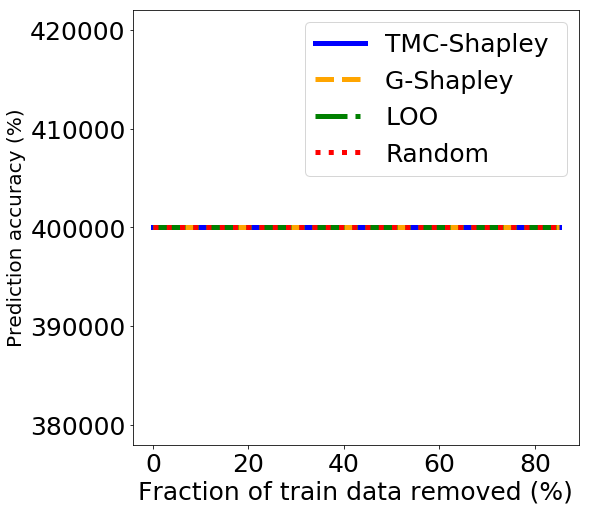

In [68]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g, dshap.vals_loo], num_plot_markers=20,
                       sources=dshap.sources)

phiên bản của mình

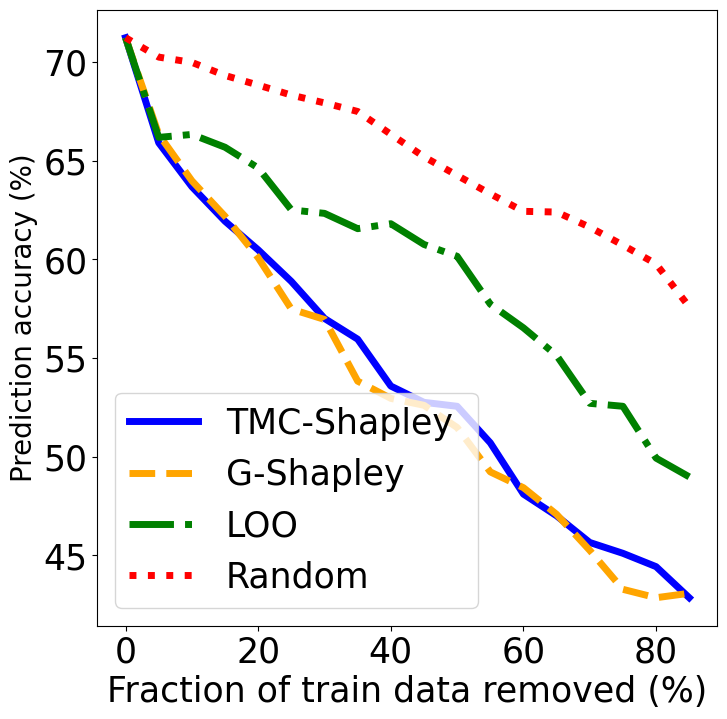

In [17]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g, dshap.vals_loo], num_plot_markers=20,
                       sources=dshap.sources)

1000

In [22]:
print(dshap.X_heldout.shape, dshap.y_heldout.shape)
print(dshap.X_test.shape, dshap.y_test.shape)

(4000, 50) (4000,)
(1000, 50) (1000,)


In [23]:
problem, model = 'classification', 'logistic'
hidden_units = [] # Empty list in the case of logistic regression.
train_size = 1000

In [24]:
d, difficulty = 50, 1
num_classes = 2
tol = 0.03
target_accuracy = 0.7
important_dims = 5
clf = return_model(model, solver='liblinear', hidden_units=tuple(hidden_units))
_param = 1.0
for _ in range(100):
    X_raw = np.random.multivariate_normal(mean=np.zeros(d), cov = np.eye(d), 
                                          size=train_size + 5000)
    _, y_raw, _, _ = label_generator(
        problem, X_raw, param = _param,  difficulty = difficulty, important=important_dims)
    clf.fit(X_raw[:train_size], y_raw[:train_size])
    test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
    if test_acc > target_accuracy:                                                         
        break
    _param *= 1.1
print('Performance using the whole training set = {0:.2f}'.format(test_acc))

Performance using the whole training set = 0.71


In [33]:
X, y = X_raw[:1000], y_raw[:1000]
X_test, y_test = X_raw[1000:], y_raw[1000:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1, overwrite=True)
dshap.run(100, 0.1)

1
2
sources LOO: {0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]),

In [34]:
print(dshap.vals_tmc.shape)
print(X_raw.shape)
print(X.shape)

(1000,)
(6000, 50)
(1000, 50)


In [40]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g,    dshap.vals_loo], name='plot_1000', num_plot_markers=20,
                       sources=dshap.sources)

d:\DataShapley\DSap1.py:60: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.model_family is 'logistic':


3


# data imbalance

In [41]:
print(type(X_raw))

<class 'numpy.ndarray'>


In [43]:
# Đếm số lượng số 0
num_zeros = np.sum(y_raw == 0)

# Đếm số lượng số 1
num_ones = np.sum(y_raw == 1)

In [44]:
print(num_zeros)
print(num_ones)

3014
2986


In [45]:
# Đếm số lượng số 0
num_zeros = np.sum(y == 0)

# Đếm số lượng số 1
num_ones = np.sum(y == 1)
print(num_zeros)
print(num_ones)

513
487


In [48]:
total_zeros = np.sum(y_raw == 0)
total_ones = np.sum(y_raw == 1)
train_zeros = np.sum(y == 0)
train_ones = np.sum(y == 1)
desired_ones = train_zeros // 5
print(desired_ones)
if desired_ones > train_ones:
    desired_ones = train_ones
idx_zeros = np.where(y == 0)[0]
idx_ones = np.where(y == 1)[0]
np.random.shuffle(idx_ones)
train_idx_ones = idx_ones[:desired_ones]
train_idx_zeros = idx_zeros
train_idx = np.concatenate((train_idx_zeros, train_idx_ones))
x_train = X[train_idx]
y_train = y[train_idx]
# Tạo lại tập kiểm tra sao cho cân bằng
remaining_idx = np.setdiff1d(np.arange(len(y_raw)), train_idx)
x_remaining = X_raw[remaining_idx]
y_remaining = y_raw[remaining_idx]
remaining_zeros = np.sum(y_remaining == 0)
remaining_ones = np.sum(y_remaining == 1)
print('data point con lai:', remaining_ones, remaining_zeros)
num_balanced = min(remaining_zeros, remaining_ones)
remaining_idx_zeros = np.where(y_remaining == 0)[0]
remaining_idx_ones = np.where(y_remaining == 1)[0]

np.random.shuffle(remaining_idx_zeros)
np.random.shuffle(remaining_idx_ones)
test_idx_zeros = remaining_idx_zeros[:num_balanced]
test_idx_ones = remaining_idx_ones[:num_balanced]
# Kết hợp lại thành chỉ số tập kiểm tra mới
test_idx = np.concatenate((test_idx_zeros, test_idx_ones))

# Cập nhật tập kiểm tra mới
x_test = x_remaining[test_idx]
y_test = y_remaining[test_idx]
# Kiểm tra tỷ lệ cuối cùng
final_train_zeros = np.sum(y_train == 0)
final_train_ones = np.sum(y_train == 1)
final_test_zeros = np.sum(y_test == 0)
final_test_ones = np.sum(y_test == 1)

print(f'Tập huấn luyện mới có {final_train_zeros} số 0 và {final_train_ones} số 1')
print(f'Tập kiểm tra mới có {final_test_zeros} số 0 và {final_test_ones} số 1')

102
data point con lai: 2884 2501
Tập huấn luyện mới có 513 số 0 và 102 số 1
Tập kiểm tra mới có 2501 số 0 và 2501 số 1


In [53]:
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(x_train, y_train, x_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1, overwrite=True)
dshap.run(100, 0.1)

d:\DataShapley\DSap1.py:60: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.model_family is 'logistic':


1
2
sources LOO: {0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]),

In [54]:
print(dshap.vals_tmc.shape)
print(X_raw.shape)
print(X.shape)

(615,)
(6000, 50)
(1000, 50)


In [55]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g,    dshap.vals_loo], name='plot_615', num_plot_markers=20,
                       sources=dshap.sources)

3


In [56]:
total_zeros = np.sum(y_raw == 0)
total_ones = np.sum(y_raw == 1)
train_zeros = np.sum(y == 0)
train_ones = np.sum(y == 1)
desired_ones = train_ones // 5 * 3
desired_zeros = train_zeros // 5 * 3
print(desired_ones, desired_zeros)
idx_zeros = np.where(y == 0)[0]
idx_ones = np.where(y == 1)[0]
np.random.shuffle(idx_ones)
train_idx_ones = idx_ones[:desired_ones]
np.random.shuffle(idx_zeros)
train_idx_zeros = idx_zeros[:desired_zeros]
train_idx = np.concatenate((train_idx_zeros, train_idx_ones))
x_train = X[train_idx]
y_train = y[train_idx]
# Tạo lại tập kiểm tra sao cho cân bằng
remaining_idx = np.setdiff1d(np.arange(len(y_raw)), train_idx)
x_remaining = X_raw[remaining_idx]
y_remaining = y_raw[remaining_idx]
remaining_zeros = np.sum(y_remaining == 0)
remaining_ones = np.sum(y_remaining == 1)
print('data point con lai:', remaining_ones, remaining_zeros)
num_balanced = min(remaining_zeros, remaining_ones, 2500)
remaining_idx_zeros = np.where(y_remaining == 0)[0]
remaining_idx_ones = np.where(y_remaining == 1)[0]

np.random.shuffle(remaining_idx_zeros)
np.random.shuffle(remaining_idx_ones)
test_idx_zeros = remaining_idx_zeros[:num_balanced]
test_idx_ones = remaining_idx_ones[:num_balanced]
# Kết hợp lại thành chỉ số tập kiểm tra mới
test_idx = np.concatenate((test_idx_zeros, test_idx_ones))

# Cập nhật tập kiểm tra mới
x_test = x_remaining[test_idx]
y_test = y_remaining[test_idx]
# Kiểm tra tỷ lệ cuối cùng
final_train_zeros = np.sum(y_train == 0)
final_train_ones = np.sum(y_train == 1)
final_test_zeros = np.sum(y_test == 0)
final_test_ones = np.sum(y_test == 1)

print(f'Tập huấn luyện mới có {final_train_zeros} số 0 và {final_train_ones} số 1')
print(f'Tập kiểm tra mới có {final_test_zeros} số 0 và {final_test_ones} số 1')

291 306
data point con lai: 2695 2708
Tập huấn luyện mới có 306 số 0 và 291 số 1
Tập kiểm tra mới có 2500 số 0 và 2500 số 1


In [57]:
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(x_train, y_train, x_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1, overwrite=True)
dshap.run(100, 0.1)

1
2
sources LOO: {0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]),

In [58]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g,    dshap.vals_loo], name='plot_balance', num_plot_markers=20,
                       sources=dshap.sources)

3


# label poison

In [60]:
def add_label_noise(x_train, y_train, num_classes, shuffle_per):
    """
    Thêm label noise vào tập huấn luyện theo tỷ lệ `shuffle_per`.

    Args:
        x_train (np.ndarray): Dữ liệu huấn luyện.
        y_train (np.ndarray): Nhãn của dữ liệu huấn luyện.
        num_classes (int): Số lượng lớp (nhãn).
        shuffle_per (float): Tỷ lệ phần trăm mẫu cần thay đổi nhãn.

    Returns:
        np.ndarray, np.ndarray: Dữ liệu huấn luyện và nhãn sau khi thêm label noise.
    """
    # Xác định số lượng mẫu cần trộn (poison)
    total_shuffles = int(shuffle_per * len(y_train))
    
    # Chọn ngẫu nhiên các chỉ số của tập huấn luyện để thay đổi nhãn
    shuffle_inds = np.random.choice(len(y_train), size=total_shuffles, replace=False)
    noise_mask = np.zeros(len(y_train), dtype=int)
    # Thay đổi nhãn của các mẫu được chọn một cách ngẫu nhiên
    for index in shuffle_inds:
        cur_label = y_train[index]
        new_label = np.random.randint(num_classes)
        while new_label == cur_label:
            new_label = np.random.randint(num_classes)
        y_train[index] = new_label
        noise_mask[index] = 1
    return x_train, y_train, noise_mask

# Giả sử x_train và y_train đã được định nghĩa từ trước
# Ví dụ sử dụng:
num_classes = len(set(y_train))  # Số lượng lớp (nhãn)
shuffle_per = 0.3  # Tỷ lệ phần trăm mẫu cần thay đổi nhãn

x_train_noisy, y_train_noisy, noise_mask = add_label_noise(x_train, y_train, num_classes, shuffle_per)

# Kiểm tra kết quả
print(f'Trước khi thêm label noise: {np.bincount(y_train)}')
print(f'Sau khi thêm label noise: {np.bincount(y_train_noisy)}')
print(f'Mảng đánh dấu nhiễu: {np.bincount(noise_mask)}')

Trước khi thêm label noise: [308 289]
Sau khi thêm label noise: [308 289]
Mảng đánh dấu nhiễu: [418 179]


In [61]:
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(x_train_noisy, y_train_noisy, x_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1, overwrite=True)
dshap.run(100, 0.1)

1
2
sources LOO: {0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]),

In [62]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g,    dshap.vals_loo], name='plot_balance_noise', num_plot_markers=20,
                       sources=dshap.sources)

3


In [51]:
len(set(y_test))

2

In [52]:
len(set(y_train))

2

In [63]:
import matplotlib.pyplot as plt

In [64]:
def performance_plots_poison(self, vals, name=None, 
                          num_plot_markers=20, sources=None, noise_mask=None):
        """Plots the effect of removing valuable points.
        
        Args:
            vals: A list of different valuations of data points each
                 in the format of an array in the same length of the data.
            name: Name of the saved plot if not None.
            num_plot_markers: number of points in each plot.
            sources: If values are for sources of data points rather than
                   individual points. In the format of an assignment array
                   or dict.
                   
        Returns:
            Plots showing the change in performance as points are removed
            from most valuable to least.
        """
        # plt.rcParams['figure.figsize'] = 8,8
        # plt.rcParams['font.size'] = 25
        # plt.xlabel('Fraction of train data removed (%)')
        # plt.ylabel('Prediction accuracy (%)', fontsize=20)
        if not isinstance(vals, list) and not isinstance(vals, tuple):
            vals = [vals]
        if sources is None:
            sources = {i:np.array([i]) for i in range(len(self.X))}
        elif not isinstance(sources, dict):
            sources = {i:np.where(sources==i)[0] for i in set(sources)}
        vals_sources = [np.array([np.sum(val[sources[i]]) 
                                  for i in range(len(sources.keys()))])
                  for val in vals]
        noise_sorted_indices = np.argsort(vals_sources[0])[::-1]
        sorted_noise_indices = np.where(noise_mask[noise_sorted_indices] == 1)[0]
        visualize_values_distr_sorted(noise_sorted_indices, sorted_noise_indices, trsize, portion, vals_sources)
        # if len(sources.keys()) < num_plot_markers:
        #     num_plot_markers = len(sources.keys()) - 1
        # plot_points = np.arange(
        #     0, 
        #     max(len(sources.keys()) - 10, num_plot_markers),
        #     max(len(sources.keys())//num_plot_markers, 1)
        # )
        # perfs = [self._portion_performance(
        #     np.argsort(vals_source)[::-1], plot_points, sources=sources)
        #          for vals_source in vals_sources]
        # print(len(perfs))
        # rnd = np.mean([self._portion_performance(
        #     np.random.permutation(np.argsort(vals_sources[0])[::-1]),
        #     plot_points, sources=sources) for _ in range(10)], 0)
        # plt.plot(plot_points/len(self.X) * 100, perfs[0] * 100, 
        #          '-', lw=5, ms=10, color='b')
        # if len(vals)==3:
        #     plt.plot(plot_points/len(self.X) * 100, perfs[1] * 100, 
        #              '--', lw=5, ms=10, color='orange')
        #     legends = ['TMC-Shapley ', 'G-Shapley ', 'LOO', 'Random']
        # elif len(vals)==2:
        #     legends = ['TMC-Shapley ', 'LOO', 'Random']
        # else:
        #     legends = ['TMC-Shapley ', 'Random']
        # plt.plot(plot_points/len(self.X) * 100, perfs[-1] * 100, 
        #          '-.', lw=5, ms=10, color='g')
        # plt.plot(plot_points/len(self.X) * 100, rnd * 100, 
        #          ':', lw=5, ms=10, color='r')    
        # plt.legend(legends)
        # if self.directory is not None and name is not None:
        #     plt.savefig(os.path.join(
        #         self.directory, 'plots', '{}.png'.format(name)),
        #                 bbox_inches = 'tight')
        #     plt.close()

def visualize_values_distr_sorted(noise_sorted_indices, sorted_noise_indices, trsize, portion, vals_sources, poisoned=None):
    x1, y1, base = [], [], []
    if poisoned is None:
        poisoned = int(trsize * portion)
        
    for vari in range(10, trsize, 10):
        if vari < 3000:
            found = 0
            actual_found = 0
            for i in range(vari):
                index = noise_sorted_indices[i]
                if vals_sources[index]:
                    found += vals_sources[index]
                    if index in sorted_noise_indices:
                        actual_found += 1
            synthetic_found = found - actual_found
            detection_rate = found / poisoned
            baseline = vari * 0.2 * 0.9
            print(f'inspected: {vari}, found: {found} actual found: {actual_found} synthetic found: {synthetic_found}, detection rate: {detection_rate:.2f} baseline: {baseline:.2f}')
            x1.append(vari)
            y1.append(found)
            base.append(vari * poisoned / trsize * 1.0)
            
    plt.scatter(x1, y1, s=10, color='red')
    plt.scatter(x1, base, s=10, color='orange')
    plt.xlabel('Inspected Images')
    plt.ylabel('Detected Images')
    plt.yticks([0, 1])
    plt.title('Detection vs Gradient Inspection')
    plt.show()
    def _portion_performance(self, idxs, plot_points, sources=None):
        """Given a set of indexes, starts removing points from 
        the first elemnt and evaluates the new model after
        removing each point."""
        if sources is None:
            sources = {i:np.array([i]) for i in range(len(self.X))}
        elif not isinstance(sources, dict):
            sources = {i:np.where(sources==i)[0] for i in set(sources)}
        scores = []
        init_score = self.random_score
        for i in range(len(plot_points), 0, -1):
            keep_idxs = np.concatenate([sources[idx] for idx 
                                        in idxs[plot_points[i-1]:]], -1)
            X_batch, y_batch = self.X[keep_idxs], self.y[keep_idxs]
            if self.sample_weight is not None:
                sample_weight_batch = self.sample_weight[keep_idxs]
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                if (self.is_regression 
                    or len(set(y_batch)) == len(set(self.y_test))):
                    self.restart_model()
                    if self.sample_weight is None:
                        self.model.fit(X_batch, y_batch)
                    else:
                        self.model.fit(X_batch, y_batch,
                                      sample_weight=sample_weight_batch)
                    scores.append(self.value(
                        self.model,
                        metric=self.metric,
                        X=self.X_heldout,
                        y=self.y_heldout
                    ))
                else:
                    scores.append(init_score)
        return np.array(scores)[::-1]

In [ ]:
dshap.performance_plots_poison([dshap.vals_tmc, dshap.vals_g,    dshap.vals_loo], name='plot_balance_noise', num_plot_markers=20,
                       sources=dshap.sources, noise_mask= noise_mask)

In [70]:
print(dshap.vals_tmc.shape)

(597,)


# sample weighted

In [ ]:
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(x_train, y_train, x_test, y_test, num_test, model_family=model, metric='accuracy',
              sample_weight = {0: 1, 1: 5}, directory=directory, seed=1, overwrite=True)
dshap.run(100, 0.1)